C:\Users\Armin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


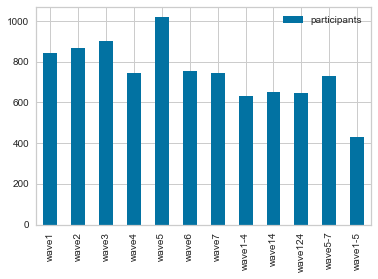

In [1]:
#Steps 5-7

import numpy as np
import pandas as pd
import datetime
import pandas_profiling as pp
from IPython.display import display, HTML
import pymannkendall as mk
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from yellowbrick.regressor import ResidualsPlot
from sklearn.linear_model import Ridge
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor


%matplotlib inline
pd.options.display.max_columns = None

pd.options.display.max_rows = 10
pd.options.display.width = 200
np.set_printoptions(precision = 4, suppress = True) 

legit_classes1 = [67,71,72,74,77,78,79,81,83,86,100,101,103,121,122,125,126,127,129,130,131,133,135,138]
legit_classes2 = [73,74,78,81,82,86,100,103,124,125,131,133,135,141,250,251,256,258,259,261,262,263,272,273,277,279,290,291,292,296,297,298,299,300,301,302,303,304,305,306,307,308,310]
participants = pd.read_csv("C:/Users/Armin/Documents/VU/thesis/original/02_MyMovez/8. Metadata/Participant_Info.csv", sep= ';')

par_w1 = participants["W1"] == 1
par_w2 = participants["W2"] == 1
par_w3 = participants["W3"] == 1
par_w4 = participants["W4"] == 1
par_w5 = participants["W5"] == 1
par_w6 = participants["W6"] == 1
par_w7 = participants["W7"] == 1

total1 = len(participants[par_w1])
total2 = len(participants[par_w3])
total3 = len(participants[par_w2])
total4 = len(participants[par_w4])
total5 = len(participants[par_w5])
total6 = len(participants[par_w6])
total7 = len(participants[par_w7])
total1_4 = len(participants[par_w1 & par_w2 & par_w3 & par_w4])
total14 = len(participants[par_w1 & par_w4])
total124 = len(participants[par_w1 & par_w2 & par_w4])
total5_7 = len(participants[par_w5 & par_w6 & par_w7])
total1_5 = len(participants[par_w1 & par_w2 & par_w3 & par_w4 & par_w5])

par_per_wave = pd.DataFrame({
    'participants': [total1, total2, total3, total4, total5, total6, total7, total1_4, total14, total124, total5_7, total1_5]}, index=['wave1', 'wave2', 'wave3', 'wave4', 'wave5', 'wave6', 'wave7', 'wave1-4', 'wave14','wave124', 'wave5-7', 'wave1-5'])

par_per_wave.plot.bar()


#display(participants[par_w1 & par_w2 & par_w3 & par_w4 & par_w5 & par_w6 & par_w7])
#print(participants[par_w1 & par_w2 & par_w3 & par_w4].count)


In [2]:
#getting participants from 5 to 7

participants5_7 = participants[['Child', 'Class_Y3']][par_w5 & par_w6 & par_w7]
participants5_7 = participants5_7[participants5_7["Class_Y3"].isin(legit_classes2)]
participants5_7 = participants5_7["Child"].tolist()

In [3]:
#fit
#compare waves with eachother as percentage for example
fit_clean = pd.read_csv("C:/Users/Armin/Documents/VU/thesis/original/02_MyMovez/5. Fitbit data/Fitbit_W17_cleaned_imputation.csv", sep= ';')
fit_clean5_7 = fit_clean[fit_clean["Child"].isin(participants5_7)]
fit_clean5_7 = fit_clean5_7[fit_clean5_7["Wave"] > 4]

fit_clean5_7['Date'] = pd.to_datetime(fit_clean5_7['Date'])
fit_clean5_7['Weekend'] = fit_clean5_7['Date'].dt.day_name()

fit_clean5_7['Weekend'].loc[(fit_clean5_7['Weekend'].isin(['Saturday', 'Sunday']))] = 0
fit_clean5_7['Weekend'].loc[(fit_clean5_7['Weekend'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']))] = 1
fit_clean5_7 = fit_clean5_7.drop(columns = ['Day', 'Imputed','Participated', 'Date'])

C:\Users\Armin\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,Child,Wave,School,Class,Steps,Sex,Age,Weekend_steps,Week_steps,MVPA,Weekend_MVPA,Week_MVPA
0,1414,5,26,74,5461.000000,0,11.0,NaN,5461.000000,66.666667,NaN,66.666667
1,1414,6,26,74,10157.000000,0,12.0,12940.0,8765.500000,102.333333,123.0,92.000000
2,1414,7,26,74,5191.333333,0,12.0,4178.0,5698.000000,24.666667,61.0,6.500000
3,1420,5,26,74,10688.000000,0,12.0,NaN,10688.000000,30.666667,NaN,30.666667
4,1420,6,26,74,10257.000000,0,12.0,9363.0,10480.500000,50.200000,22.0,57.250000
...,...,...,...,...,...,...,...,...,...,...,...,...
2182,6182,6,60,310,7995.600000,0,12.0,1422.5,12377.666667,39.600000,0.0,66.000000
2183,6182,7,60,310,6515.400000,0,12.0,4355.0,7955.666667,15.600000,4.5,23.000000
2184,6183,5,60,310,6896.200000,1,12.0,5137.5,8068.666667,23.600000,26.5,21.666667
2185,6183,6,60,310,12348.666667,1,12.0,NaN,12348.666667,24.666667,NaN,24.666667


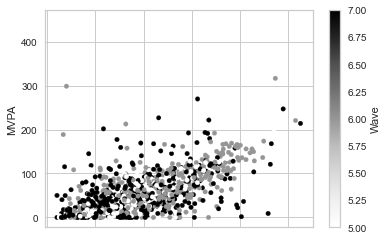

In [4]:
# getting fitbit data and splitting it in weekdays and weekend days for wave 5-7
avg_steps_57 = fit_clean5_7[['School', 'Class', 'Child', 'Wave', 'Steps', 'Weekend', 'Sex', 'Age']].copy()
avg_mvpa_57 = fit_clean5_7[['School', 'Class', 'Child', 'Wave', 'Minutes_MVPA', 'Weekend', 'Sex', 'Age']].copy()

temp = avg_steps_57.groupby(['Child','Wave', 'Weekend']).mean()
temp = temp.reset_index()
weekend_days = temp[['Child', 'Wave','Steps']][temp['Weekend'] == 0]
week_days = temp[['Child', 'Wave','Steps']][temp['Weekend'] == 1]
weekend_days.columns = ['Child', 'Wave', 'Weekend_steps']
week_days.columns = ['Child', 'Wave', 'Week_steps']

avg_steps_57 = avg_steps_57.groupby(['Child', 'Wave']).mean()
avg_steps_57.columns = ['School', 'Class', 'Steps', 'Sex', 'Age']
avg_steps_57 = avg_steps_57.reset_index()
avg_steps_57 = avg_steps_57.merge(weekend_days, how = 'left')
avg_steps_57 = avg_steps_57.merge(week_days, how = 'left')

temp = avg_mvpa_57.groupby(['Child','Wave', 'Weekend']).mean()
temp = temp.reset_index()
weekend_mvpa = temp[['Child', 'Wave','Minutes_MVPA']][temp['Weekend'] == 0]
week_mvpa = temp[['Child', 'Wave','Minutes_MVPA']][temp['Weekend'] == 1]
weekend_mvpa.columns = ['Child', 'Wave', 'Weekend_MVPA']
week_mvpa.columns = ['Child', 'Wave', 'Week_MVPA']

avg_mvpa_57 = avg_mvpa_57.groupby(['Child', 'Wave']).mean()
avg_mvpa_57.columns = ['School', 'Class', 'MVPA', 'Sex', 'Age']
avg_mvpa_57 = avg_mvpa_57.reset_index()
avg_mvpa_57 = avg_mvpa_57.merge(weekend_mvpa, how = 'left')
avg_mvpa_57 = avg_mvpa_57.merge(week_mvpa, how = 'left')

full_table_57 = avg_steps_57.merge(avg_mvpa_57)

display(full_table_57)
full_table_57.plot.scatter(x = 'Steps', y = 'MVPA', c = 'Wave')

In [5]:
#getting the overall trend (so postive, no trend or negative) and getting the trend line (slope) 
new_table = fit_clean5_7
new_table = new_table.drop(['Wave', 'Minutes_MVPA', 'Weekend'], axis = 1)
new_table["Trend"] = np.nan

In [6]:
for index, row in new_table.iterrows():
    temp = mk.original_test(new_table[new_table['Child'] == row['Child']]['Steps'], alpha=0.05).slope
    overall = mk.original_test(new_table[new_table['Child'] == row['Child']]['Steps'], alpha=0.05).trend
    new_table.loc[new_table['Child'] == row['Child'], 'Trend'] = temp
    new_table.loc[new_table['Child'] == row['Child'], 'Overall_Trend'] = overall    

In [9]:
temp = new_table[['Child', 'Trend','Overall_Trend']].drop_duplicates()
full_table_57 = full_table_57.merge(temp)
full_table_57

,Child,Wave,School,Class,Steps,Sex,Age,Weekend_steps,Week_steps,MVPA,Weekend_MVPA,Week_MVPA,Trend,Overall_Trend
0,1414,5,26,74,5461.000000,0,11.0,NaN,5461.000000,66.666667,NaN,66.666667,-141.285714,no trend
1,1414,6,26,74,10157.000000,0,12.0,12940.0,8765.500000,102.333333,123.0,92.000000,-141.285714,no trend
2,1414,7,26,74,5191.333333,0,12.0,4178.0,5698.000000,24.666667,61.0,6.500000,-141.285714,no trend
3,1420,5,26,74,10688.000000,0,12.0,NaN,10688.000000,30.666667,NaN,30.666667,25.616667,no trend
4,1420,6,26,74,10257.000000,0,12.0,9363.0,10480.500000,50.200000,22.0,57.250000,25.616667,no trend
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2182,6182,6,60,310,7995.600000,0,12.0,1422.5,12377.666667,39.600000,0.0,66.000000,52.861111,no trend
2183,6182,7,60,310,6515.400000,0,12.0,4355.0,7955.666667,15.600000,4.5,23.000000,52.861111,no trend
2184,6183,5,60,310,6896.200000,1,12.0,5137.5,8068.666667,23.600000,26.5,21.666667,766.450000,no trend
2185,6183,6,60,310,12348.666667,1,12.0,NaN,12348.666667,24.666667,NaN,24.666667,766.450000,no trend


In [10]:
# getting the class trend (mean of class)
temp = full_table_57[['Child', 'Class', 'Trend']].drop_duplicates()
temp = temp[['Class', 'Trend']]
temp = temp.groupby('Class').mean()
temp.columns = ['Class_Trend']
temp = temp.reset_index()
full_table_57 = full_table_57.merge(temp)

In [11]:
#socio
socio_gbl_567 = pd.read_excel("C:/Users/Armin/Documents/VU/thesis/original/02_MyMovez/1. Social network data/social_networks_global_waves567.xlsx", sep= ';')
socio_lcl_567 = pd.read_excel("C:/Users/Armin/Documents/VU/thesis/original/02_MyMovez/1. Social network data/social_networks_local_waves567.xlsx", sep= ';')

socio_lcl_567 = socio_lcl_567.rename(columns={"Node": "Child"})
socio_lcl_567 = socio_lcl_567.drop(['Unnamed: 0', 'ClusteringC'], axis = 1)
socio_gbl_567 = socio_gbl_567.drop(['Unnamed: 0'], axis = 1)

#Add socio data to the full table of week 5-7
full_table_57 = full_table_57.merge(socio_gbl_567)
full_table_57 = full_table_57.merge(socio_lcl_567)
display(full_table_57)

,Child,Wave,School,Class,Steps,Sex,Age,Weekend_steps,Week_steps,MVPA,Weekend_MVPA,Week_MVPA,Trend,Overall_Trend,Class_Trend,Avg_Short_Path,Density,Edges,Nodes,Betweeness,Closeness,Degree,Eigenvector
0,1414,5,26,74,5461.000000,0,11.0,NaN,5461.000000,66.666667,NaN,66.666667,-141.285714,no trend,459.262847,0.814103,0.570513,89,13,0.001515,0.592593,1.000000,0.277652
1,1414,6,26,74,10157.000000,0,12.0,12940.0,8765.500000,102.333333,123.0,92.000000,-141.285714,no trend,459.262847,0.814103,0.570513,89,13,0.001515,0.592593,1.000000,0.277652
2,1414,7,26,74,5191.333333,0,12.0,4178.0,5698.000000,24.666667,61.0,6.500000,-141.285714,no trend,459.262847,0.814103,0.570513,89,13,0.001515,0.592593,1.000000,0.277652
3,1420,5,26,74,10688.000000,0,12.0,NaN,10688.000000,30.666667,NaN,30.666667,25.616667,no trend,459.262847,0.814103,0.570513,89,13,0.024387,0.592593,1.583333,0.277652
4,1420,6,26,74,10257.000000,0,12.0,9363.0,10480.500000,50.200000,22.0,57.250000,25.616667,no trend,459.262847,0.814103,0.570513,89,13,0.024387,0.592593,1.583333,0.277652
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2140,6159,6,30,308,10498.333333,0,11.0,6469.0,12513.000000,60.000000,37.0,71.500000,-359.800000,no trend,-232.241057,1.208791,0.791209,144,14,0.032685,0.928571,1.923077,0.302602
2141,6159,7,30,308,10921.666667,0,11.0,8464.0,12150.500000,55.000000,80.0,42.500000,-359.800000,no trend,-232.241057,1.208791,0.791209,144,14,0.032685,0.928571,1.923077,0.302602
2142,6161,5,30,308,15449.200000,0,10.0,16579.5,14695.666667,115.000000,116.5,114.000000,-889.487500,no trend,-232.241057,1.208791,0.791209,144,14,0.037218,1.000000,1.846154,0.323210
2143,6161,6,30,308,8337.750000,0,10.0,5815.0,9178.666667,8.000000,0.0,10.666667,-889.487500,no trend,-232.241057,1.208791,0.791209,144,14,0.037218,1.000000,1.846154,0.323210


In [12]:
#questionnaire 
questionnaire_6 = pd.read_csv("C:/Users/Armin/Documents/VU/thesis/original/02_MyMovez/4. Questionnaire data/W6_Main_questions.csv", sep= ';')

temp = questionnaire_6.loc[:, questionnaire_6.columns.str.contains('facili')]
temp['Child'] = ""
temp = questionnaire_6[temp.columns]
temp = temp.set_index('Child')

# Give a 0 or 1 value for each facility wether it is or is not in the enviroment of the child
for index, row in temp.iterrows():
    temp.loc[index,'Bos'] = row.str.contains('Bos').any()
    temp.loc[index,'Park'] = row.str.contains('Park').any()
    temp.loc[index,'Speelplein'] = row.str.contains('Speelplein').any()
    temp.loc[index,'Speeltuin'] = row.str.contains('Speeltuin').any()
    temp.loc[index,'Sportschool'] = row.str.contains('Sportschool').any()
    temp.loc[index,'Sportclub'] = row.str.contains('Sportclub').any()
    temp.loc[index,'Zwembad'] = row.str.contains('Zwembad').any()
    temp.loc[index,'Meer_zee'] = row.str.contains('Meer_zee').any()
    temp.loc[index,'Dansschool'] = row.str.contains('Dansschool').any()
    temp.loc[index,'Sporthal'] = row.str.contains('Sporthal').any()
    temp.loc[index,'Grasveld'] = row.str.contains('Grasveld').any()
    
temp.drop(temp.columns[[0,1,2,3,4,5,6,7,8,9,10]],axis=1,inplace=True)
temp = temp.astype(int)
temp

C:\Users\Armin\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (319,375,432,434,437,439,442,444,447,449,452,454,457,459,462,464,467,469,472,474,477,479,482,484,487,489) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\Armin\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Bos,Park,Speelplein,Speeltuin,Sportschool,Sportclub,Zwembad,Meer_zee,Dansschool,Sporthal,Grasveld
Child,,,,,,,,,,,
902,0,0,0,0,0,0,0,0,0,0,0
904,0,0,0,0,0,0,0,0,0,0,0
907,0,0,0,0,0,0,0,0,0,0,0
908,0,0,0,0,0,0,0,0,0,0,0
909,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6180,0,0,0,0,0,0,0,0,0,0,0
6181,1,1,1,1,1,1,1,1,1,1,1
6182,1,1,1,1,1,1,1,1,1,1,1


In [13]:
temp = temp.reset_index()
full_table_57 = full_table_57.drop(columns=['Steps', 'Weekend_steps','MVPA','Weekend_MVPA','Week_steps','Week_MVPA','Wave'])
full_table_57 = full_table_57[full_table_57.index % 3 == 0]
full_table_57 = full_table_57.merge(temp)

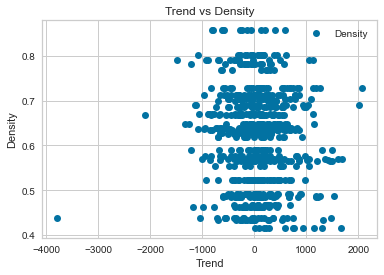

[235.2128]
[[-315.5036]]


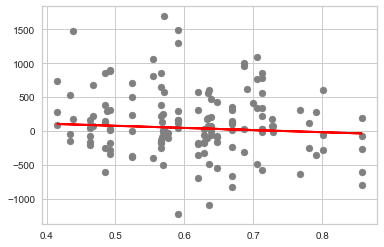

,Actual,Predicted
0,-176.000000,36.863117
1,617.750000,17.144140
2,851.027778,56.839858
3,214.800000,56.839858
4,-359.800000,-14.416421
...,...,...
138,383.300000,56.839858
139,92.345238,89.029477
140,-108.152778,53.383102
141,495.200000,69.949019


In [14]:
# do linear regression on trend by using density as variable
temp = full_table_57
temp[['Trend','Density']]
temp.plot(x='Trend', y='Density', style='o')  
plt.title('Trend vs Density')  
plt.xlabel('Trend')  
plt.ylabel('Density')  
plt.show()

X = temp['Density'].values.reshape(-1,1)
y = temp['Trend'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()  
regressor.fit(X_train, y_train)

print(regressor.intercept_)
print(regressor.coef_)

y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()
df

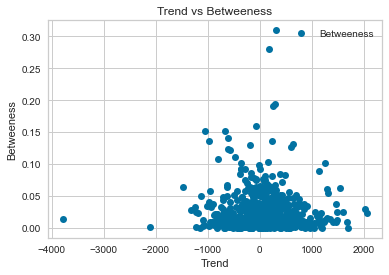

[52.7446]
[[-472.2748]]


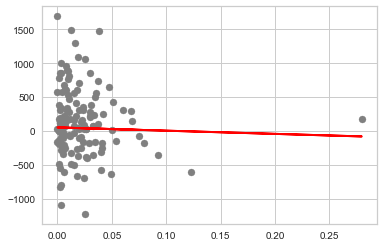

,Actual,Predicted
0,-176.000000,15.215657
1,617.750000,49.502430
2,851.027778,38.785988
3,214.800000,44.689422
4,-359.800000,37.308486
...,...,...
138,383.300000,38.207220
139,92.345238,41.111144
140,-108.152778,43.215187
141,495.200000,36.483193


In [15]:
# do linear regression on trend by using betweeness as variable
temp = full_table_57
temp[['Trend','Betweeness']]
temp.plot(x='Trend', y='Betweeness', style='o')  
plt.title('Trend vs Betweeness')  
plt.xlabel('Trend')  
plt.ylabel('Betweeness')  
plt.show()

X = temp['Betweeness'].values.reshape(-1,1)
y = temp['Trend'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()  
regressor.fit(X_train, y_train)

print(regressor.intercept_)
print(regressor.coef_)

y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()
df

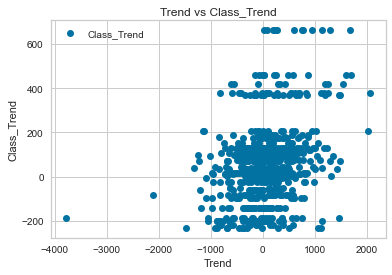

[-19.8589]
[[1.0902]]


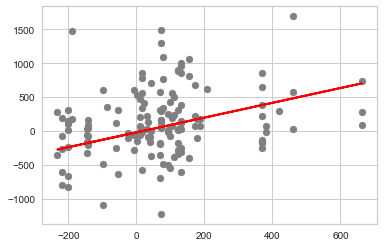

,Actual,Predicted
0,-176.000000,-176.889970
1,617.750000,207.525784
2,851.027778,383.154816
3,214.800000,383.154816
4,-359.800000,-273.045135
...,...,...
138,383.300000,383.154816
139,92.345238,-175.006260
140,-108.152778,-48.321482
141,495.200000,101.483737


In [16]:
# do linear regression on trend by using class trend as variable
temp[['Trend','Class_Trend']]
temp.plot(x='Trend', y='Class_Trend', style='o')  
plt.title('Trend vs Class_Trend')  
plt.xlabel('Trend')  
plt.ylabel('Class_Trend')  
plt.show()

X = temp['Class_Trend'].values.reshape(-1,1)
y = temp['Trend'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

print(regressor.intercept_)
print(regressor.coef_)

y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()
df

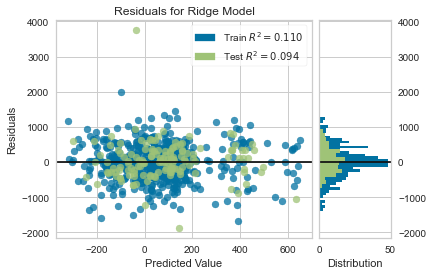

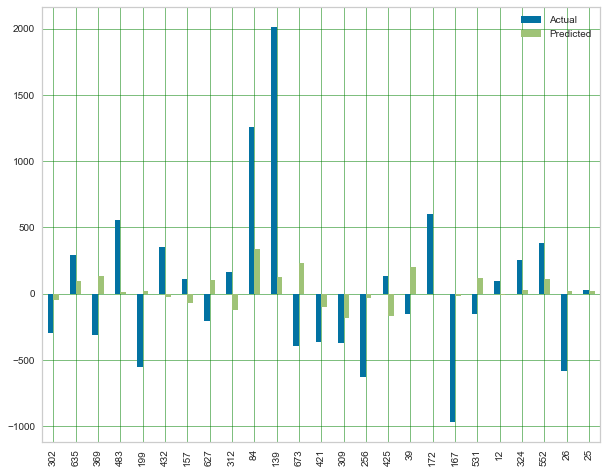

                                 OLS Regression Results                                
Dep. Variable:                  Trend   R-squared (uncentered):                   0.127
Model:                            OLS   Adj. R-squared (uncentered):              0.095
Method:                 Least Squares   F-statistic:                              4.018
Date:                Tue, 06 Oct 2020   Prob (F-statistic):                    3.80e-10
Time:                        18:40:02   Log-Likelihood:                         -5458.5
No. Observations:                 715   AIC:                                  1.097e+04
Df Residuals:                     690   BIC:                                  1.108e+04
Df Model:                          25                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

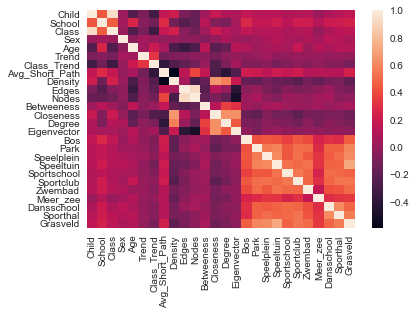

In [18]:
# linear regression on all variables. First is residual plot, second is the actual data vs predicted, third is the OLS data
# and at last is the heatmap of all variables to check for multicolinearity
X = full_table_57.drop(columns = ['Trend', 'Overall_Trend'])
y = full_table_57['Trend']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

regressor = LinearRegression()  
regressor.fit(X_train, y_train)

coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
coeff_df

y_pred = regressor.predict(X_test)

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)

model = Ridge()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

corr = full_table_57.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())
#check for multicollinearity in the data
#results is that obviously there is multicollinearity among Child, Class and school. Same applies with MVPA, Weekend MVPA etc but that is trivial too

In [19]:
# creating 2 participant pools of increasing participants and one of decreasing participants
display(full_table_57.groupby('Overall_Trend').mean())
#observations
#increasing is mostly male, high class trend, lower betweenness, more forests nearby (bos), more playgrounds (speeltuin), lowest barriers for area
#decreasing has for almost almost facilities the lowest number, 

,Child,School,Class,Sex,Age,Trend,Class_Trend,Avg_Short_Path,Density,Edges,Nodes,Betweeness,Closeness,Degree,Eigenvector,Bos,Park,Speelplein,Speeltuin,Sportschool,Sportclub,Zwembad,Meer_zee,Dansschool,Sporthal,Grasveld
Overall_Trend,,,,,,,,,,,,,,,,,,,,,,,,,,
decreasing,4670.619048,38.952381,218.666667,0.428571,11.285714,-926.444676,-3.323002,1.404878,0.609136,232.904762,19.666667,0.030789,0.705862,1.127252,0.214146,0.095238,0.047619,0.047619,0.190476,0.000000,0.095238,0.047619,0.000000,0.047619,0.095238,0.190476
increasing,4052.821429,39.321429,203.642857,0.642857,11.178571,842.094506,129.595981,1.356722,0.597506,235.142857,19.928571,0.016745,0.696737,1.184908,0.221992,0.142857,0.142857,0.250000,0.250000,0.107143,0.178571,0.142857,0.071429,0.107143,0.214286,0.250000
no trend,4724.177177,41.716216,227.503003,0.527027,11.037538,55.528415,56.375868,1.362158,0.614970,246.088589,20.055556,0.023725,0.715666,1.249258,0.224316,0.159159,0.163664,0.193694,0.277778,0.135135,0.141141,0.156156,0.051051,0.085586,0.144144,0.267267


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

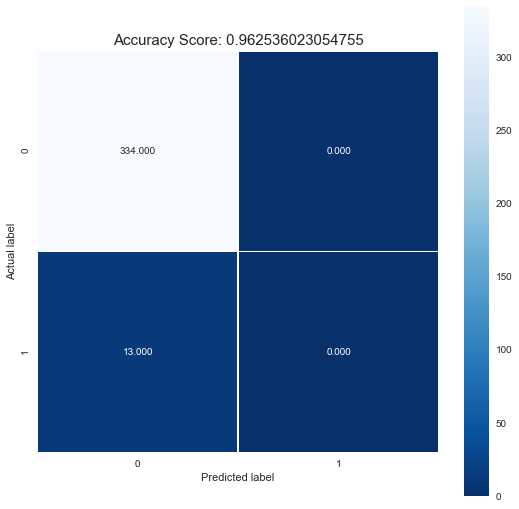

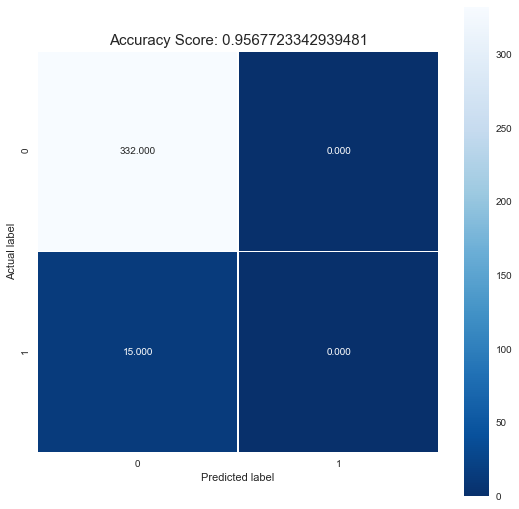

In [20]:
X = full_table_57.drop(columns = ['Trend'])
X = X[X['Overall_Trend'] != 'decreasing']
X = X.drop(['Overall_Trend', 'Child', 'School', 'Class'], axis = 1)

y = full_table_57['Overall_Trend']
y = y[y != 'decreasing']
y = y.replace(['increasing'], 1)
y = y.replace(['no trend'], 0)

lr = LogisticRegression(solver='lbfgs', max_iter=5000)

kf = KFold(n_splits=2, shuffle = True)
kf.split(X) 

for train_index, test_index in kf.split(X):
    # Split train-test
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    # Train the model
    model = lr.fit(X_train, y_train)
    predictions = lr.predict(X_test)
    cm = metrics.confusion_matrix(y_test, predictions)
    score = lr.score(X_test, y_test)
    # Append to accuracy_model the accuracy of the model
    plt.figure(figsize=(9,9))
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    all_sample_title = 'Accuracy Score: {0}'.format(score)
    plt.title(all_sample_title, size = 15);
    display(predictions)



array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

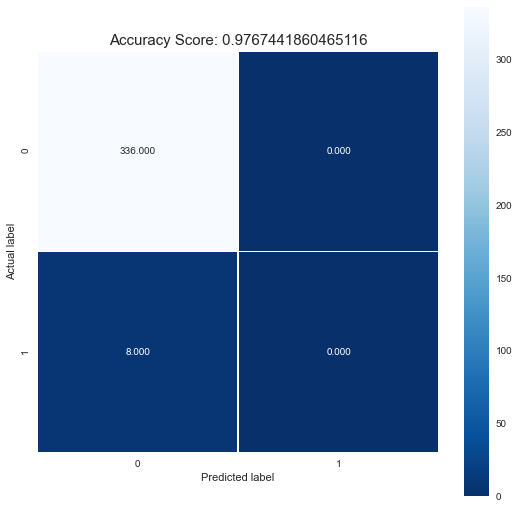

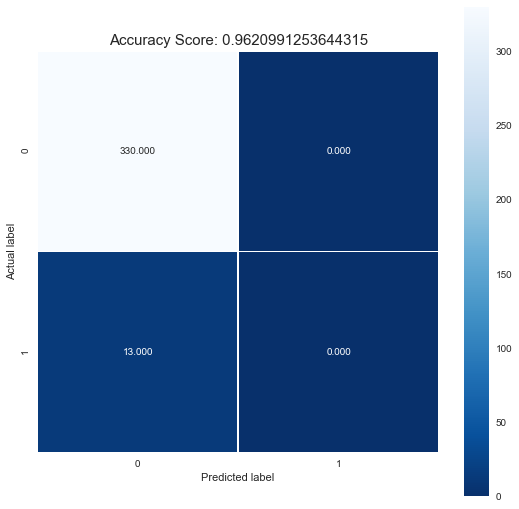

In [21]:
X = full_table_57.drop(columns = ['Trend'])
X = X[X['Overall_Trend'] != 'increasing']
X = X.drop(['Overall_Trend', 'Child', 'School', 'Class', 'Zwembad', 'Meer_zee', 'Dansschool'], axis = 1)

y = full_table_57['Overall_Trend']
y = y[y != 'increasing']
y = y.replace(['decreasing'], 1)
y = y.replace(['no trend'], 0)

lr = LogisticRegression(solver='lbfgs', max_iter=5000)

kf = KFold(n_splits=2, shuffle = True)
kf.split(X) 

for train_index, test_index in kf.split(X):
    # Split train-test
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    # Train the model
    model = lr.fit(X_train, y_train)
    predictions = lr.predict(X_test)
    cm = metrics.confusion_matrix(y_test, predictions)
    score = lr.score(X_test, y_test)
    # Append to accuracy_model the accuracy of the model
    plt.figure(figsize=(9,9))
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    all_sample_title = 'Accuracy Score: {0}'.format(score)
    plt.title(all_sample_title, size = 15);
    display(predictions)



array([0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0], dtype=int64)

array([0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1], dtype=int64)

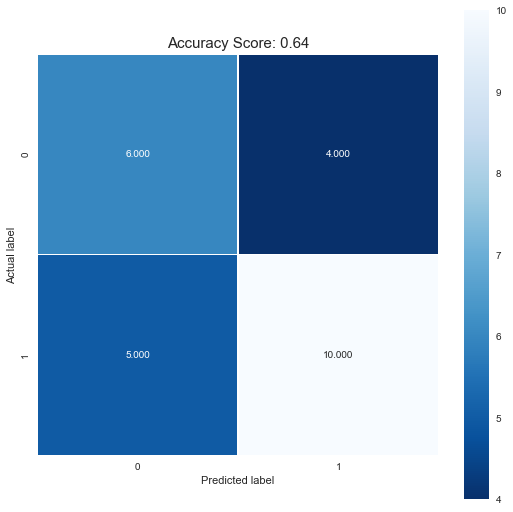

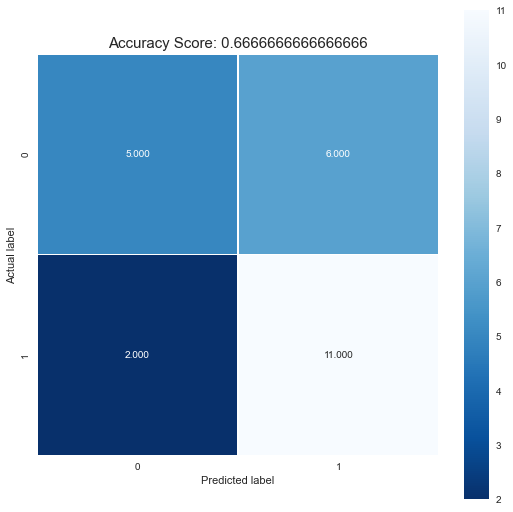

In [22]:
X = full_table_57.drop(columns = ['Trend'])
X = X[X['Overall_Trend'] != 'no trend']
X = X.drop(['Overall_Trend', 'Child', 'School', 'Class', 'Zwembad', 'Meer_zee', 'Dansschool'], axis = 1)

y = full_table_57['Overall_Trend']
y = y[y != 'no trend']
y = y.replace(['increasing'], 1)
y = y.replace(['decreasing'], 0)

lr = LogisticRegression(solver='lbfgs', max_iter=5000)

kf = KFold(n_splits=2, shuffle = True)
kf.split(X) 

for train_index, test_index in kf.split(X):
    # Split train-test
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    # Train the model
    model = lr.fit(X_train, y_train)
    predictions = lr.predict(X_test)
    cm = metrics.confusion_matrix(y_test, predictions)
    score = lr.score(X_test, y_test)
    # Append to accuracy_model the accuracy of the model
    plt.figure(figsize=(9,9))
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    all_sample_title = 'Accuracy Score: {0}'.format(score)
    plt.title(all_sample_title, size = 15);
    display(predictions)



array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

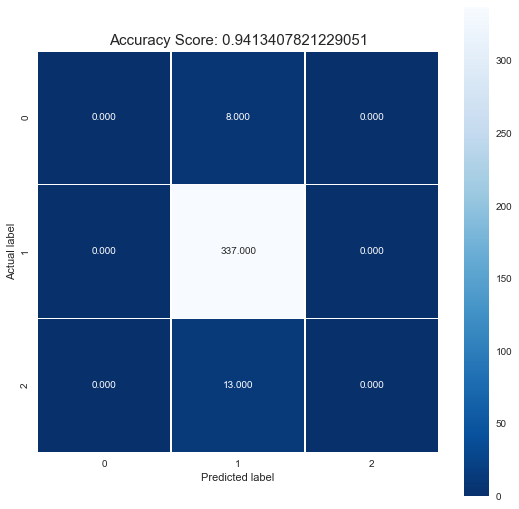

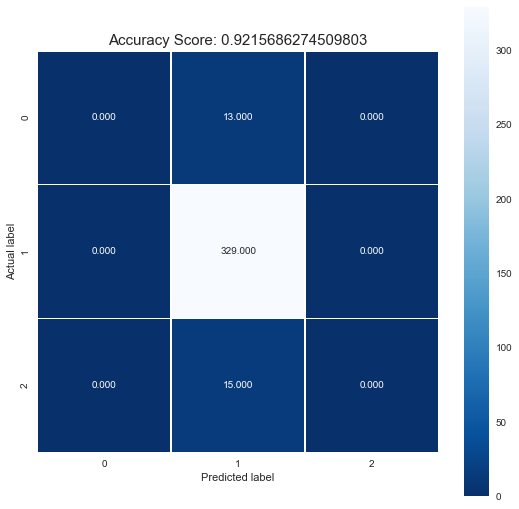

In [23]:
X = full_table_57.drop(columns = ['Trend'])
X = X.drop(['Overall_Trend', 'Child', 'School', 'Class', 'Zwembad', 'Meer_zee', 'Dansschool'], axis = 1)

y = full_table_57['Overall_Trend']
y = y.replace(['increasing'], 1)
y = y.replace(['no trend'], 0)
y = y.replace(['decreasing'], -1)

lr = LogisticRegression(solver='lbfgs', max_iter=5000)

kf = KFold(n_splits=2, shuffle = True)
kf.split(X) 

for train_index, test_index in kf.split(X):
    # Split train-test
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    # Train the model
    model = lr.fit(X_train, y_train)
    predictions = lr.predict(X_test)
    cm = metrics.confusion_matrix(y_test, predictions)
    score = lr.score(X_test, y_test)
    # Append to accuracy_model the accuracy of the model
    plt.figure(figsize=(9,9))
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    all_sample_title = 'Accuracy Score: {0}'.format(score)
    plt.title(all_sample_title, size = 15);
    display(predictions)

